# Task 4: Coordinate Descent Algorithm

In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [8]:
# Returns a vector, which is the result of the gradient
def gradient(A, b, x):
    return A.dot(x) - b

# Returns a scalar, which is the norm of the result above
def gradientNorm(A, b, x):
    return np.linalg.norm(A.dot(x) - b)

# Returns a scalar, which is the norm of the difference between x and x*
def differenceNorm(x, x_opt):
    return np.linalg.norm(x - x_opt)

# Returns a scalar, which is the norm of x
def norm(x):
    return np.linalg.norm(x)

![image.png](images/coordinateDescent1.png)
![image.png](images/coordinateDescent2.png)
![image.png](images/coordinateDescent3.png)

In [9]:
def coordinateDescent(A, b, maxIters = 5000, epsilon = 10e-5, period = 100):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # Fixed step size
    alpha = 0.0001
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = []
    # Lipschitz constant
    L = np.linalg.norm(A * A.transpose())
    range
    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        for index in range(0, dim):
            x_totalGradient = x - alpha * gradient(A, b, x)
            x[index] = x_totalGradient[index]
            x_iterations.append(x)
            iter += 1
    
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}"
    differenceNorms = []
    for x_sol in x_iterations:
        differenceNorms.append(differenceNorm(x_sol, x))
    differenceNorms = np.array(differenceNorms)
    return (x, x_iterations, differenceNorms, stoppingReason)

In [10]:
# Plotting the difference norms log ||x - x*||2
def plotDifferenceNorms(scale):

    A = np.load(f"{scale}Matrix.npy", allow_pickle=True)
    # print("The matrix A")
    # print(A)

    b = np.load(f"{scale}Vector.npy", allow_pickle=True)
    # print("\nThe vector b")
    # print(b)
    x_opt = np.load(f"{scale}Solution.npy", allow_pickle=True)

    print(f"\nThe dimension is {b.size}")

    start = time.time()
    x_opt_GD, x_iterations_GD, differenceNorms, stoppingReason = coordinateDescent(A, b, 6000)
    end = time.time()
    print(f"\nThe optimization algorithm runs in {end - start} seconds")
    print("\nOptimal solution x found by block coordinate descent")
    print(x_opt_GD)
    print("\nTheoretical optimal solution x*")
    print(x_opt)
    print("\nReason of stopping")
    print(stoppingReason)

    figure(figsize=(6, 4), dpi=80)

    iterations = np.arange(1, differenceNorms.size + 1, 1)

    plt.plot(iterations, differenceNorms, label = f"Experimental convergence rate")#, marker='.', markersize=5)
  
    size = 14

    plt.title(f"Convergence rate of\nconjugate gradient algorithm", size=size + 6)
    plt.xticks(fontsize=size)    
    plt.yticks(fontsize=size)  
    plt.yscale('log')
    # plt.xlim(left = 1)
    # plt.xticks(list(plt.xticks()[0]) + [1])
    plt.xlabel("Iterations", size=size)
    plt.ylabel(r'$log||x-x*||_2$', size=size)

    legend = plt.legend(loc=3, frameon=False, fontsize=size)

In [11]:
# Choose scale option
scale = "small"
# scale = "large"
# scale = "huge"

plotDifferenceNorms(scale)


The dimension is 10

The optimization algorithm runs in 0.03200101852416992 seconds

Optimal solution x found by block coordinate descent
[4.99204165 4.71900701 5.06545568 4.83385033 4.78570897 5.39320623
 4.6058317  4.65568035 4.76802958 4.90708099]

Theoretical optimal solution x*
[ 1  2  3  4  5  6  7  8  9 10]

Reason of stopping
Max iterations (6000) exceeded


ValueError: Data has no positive values, and therefore can not be log-scaled.

The matrix A first two lines
[77.47884308 67.20860406 53.41517914 55.83997086 55.65212282 68.24230098
 48.01783228 56.19355533 49.58743731 68.69026142 50.64044028 60.33331026
 48.18864451 42.05627212 60.76891825 56.23595122 59.98201872 53.07716706
 48.54267329 63.34076446]
[67.20860406 83.35824993 54.41507042 61.18629922 56.45122011 75.58657564
 42.23010613 65.81679437 51.30935711 70.53888354 54.19461819 63.12001131
 46.18098371 43.68606257 59.12747543 64.52729381 60.77075199 54.85398053
 53.97564175 64.45761775]

The vector b
[11673.88186531 12187.06062788 10998.48125905 11025.71932468
 12340.71211116 13172.72266651  9341.96267409 11431.00556045
  9548.18618818 12947.61715601  8908.74184069 12803.01232136
  8656.52874585  9700.43831711 11698.99871462 10801.56564883
 12433.72317307 11406.42137025 10636.19616585 12261.90087933]

The dimension is 20
Optimal solution x found by gradient descent
[ 0.76503575  2.29561705  3.08339575  4.29565153  5.39227604  5.49450072
  6.86725861  7.704459

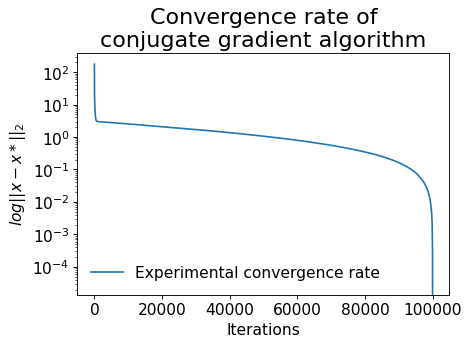

In [ ]:
# Choose scale option
# scale = "small"
scale = "large"
# scale = "huge"

A = np.load(f"{scale}Matrix.npy", allow_pickle=True)
# print("The matrix A")
# print(A)

b = np.load(f"{scale}Vector.npy", allow_pickle=True)
# print("\nThe vector b")
# print(b)
x_opt = np.load(f"{scale}Solution.npy", allow_pickle=True)

print(f"\nThe dimension is {b.size}")

start = time.time()
x_opt_GD, x_iterations_GD, differenceNorms, stoppingReason = coordinateDescent(A, b, 6000)
end = time.time()
print(f"\nThe optimization algorithm runs in {end - start} seconds")
print("\nOptimal solution x found by block coordinate descent")
print(x_opt_GD)
print("\nTheoretical optimal solution x*")
print(x_opt)
print("\nReason of stopping")
print(stoppingReason)

plotDifferenceNorms(differenceNorms)

In [ ]:
# Choose scale option
# scale = "small"
# scale = "large"
scale = "huge"

A = np.load(f"{scale}Matrix.npy", allow_pickle=True)
# print("The matrix A")
# print(A)

b = np.load(f"{scale}Vector.npy", allow_pickle=True)
# print("\nThe vector b")
# print(b)
x_opt = np.load(f"{scale}Solution.npy", allow_pickle=True)

print(f"\nThe dimension is {b.size}")

start = time.time()
x_opt_GD, x_iterations_GD, differenceNorms, stoppingReason = coordinateDescent(A, b, 6000)
end = time.time()
print(f"\nThe optimization algorithm runs in {end - start} seconds")
print("\nOptimal solution x found by block coordinate descent")
print(x_opt_GD)
print("\nTheoretical optimal solution x*")
print(x_opt)
print("\nReason of stopping")
print(stoppingReason)

plotDifferenceNorms(differenceNorms)

NameError: name 'np' is not defined